# Sentiment Analysis for BindexT

<img src = 'snoopdogg.png', width = 300 X 100>

What people talk and how people talk in social media within subcultures have a certain influence on their followers. The use of subculture language also quite different. 

This module is to use machine learning to learn the language pattern of  four twitter domains for domain predictions. 

Below is the workflow of the machine training module. 

~ 12400 tweets were scrapped from four users. 90% of the tweets use for training and 10% for prediction.


<img src = 'BindexT Sentiment Analysis Workflow.png', alt="Drawing" style="width: 700px;"/>


## 1) Data Collection - twitter mining

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import twitter, re, datetime, pandas as pd
import string
from collections import defaultdict

# Your twitter account keys go here:
twitter_keys = {
    'consumer_key':        'your consumer key here',
    'consumer_secret':     'your consumer secret key here',
    'access_token_key':    'your access token here',
    'access_token_secret': 'your access token secret code here'
}

api = twitter.Api(
    consumer_key         =   twitter_keys['consumer_key'],
    consumer_secret      =   twitter_keys['consumer_secret'],
    access_token_key     =   twitter_keys['access_token_key'],
    access_token_secret  =   twitter_keys['access_token_secret']
)


In [3]:
# set up a twitter mining object

class TweetMiner(object):

    result_limit    =   1000  
    api             =   False
    data            =   []
    
    def __init__(self, keys_dict, api, result_limit = 5000):
        
        self.api = api
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="SnoopDogg", mine_rewteets=False, max_pages=30):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            
            if last_tweet_id:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit, max_id=last_tweet_id - 1)        
            else:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'handle':          item.user.name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                }
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data

In [4]:
# Set twitter result limit

miner = TweetMiner(keys_dict = twitter_keys, api = api, result_limit=6000)

In [5]:
# Set user domain. To test the sentiment analysis prediction, four domains were use for training
# The user is the verified twitter handles

snoopdogg = miner.mine_user_tweets(user = 'SnoopDogg')
aerosmith = miner.mine_user_tweets(user = 'aerosmith')
flagaline = miner.mine_user_tweets(user = 'FLAGALine')
lovato = miner.mine_user_tweets(user = 'ddlovato')

In [6]:
# take a peek at the first 10 tweets in raw format
snoopdogg[:5]

[{'created_at': u'Tue Oct 17 20:39:48 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 17, 17, 51, 45, 8199),
  'retweet_count': 9,
  'text': u'\U0001f937\U0001f3fe\u200d\u2642\ufe0f\U0001f923\U0001f3c8\U0001f3c8 https://t.co/SgXPr18D8T https://t.co/5NLo5DiC3b',
  'tweet_id': 920388898643218440},
 {'created_at': u'Tue Oct 17 20:28:07 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 17, 17, 51, 45, 8209),
  'retweet_count': 59,
  'text': u'take flight \U0001f343\u2708\ufe0f https://t.co/LF9VGMdJrK',
  'tweet_id': 920385960247881728},
 {'created_at': u'Tue Oct 17 19:08:35 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 17, 17, 51, 45, 8212),
  'retweet_count': 555,
  'text': u'https://t.co/WLgP9JMFd6 https://t.co/m3074Rn4Bw',
  'tweet_id': 920365945561993222},
 {'created_at': u'Tue Oct 17 18:41:20 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 17, 17, 51,

In [7]:
# Check out these tweets in dataframe format 

pd.DataFrame(snoopdogg).head(10)

,created_at,handle,mined_at,retweet_count,text,tweet_id
0,Tue Oct 17 20:39:48 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008199,9,🤷🏾‍♂️🤣🏈🏈 https://t.co/SgXPr18D8T https://...,920388898643218440
1,Tue Oct 17 20:28:07 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008209,59,take flight 🍃✈️ https://t.co/LF9VGMdJrK,920385960247881728
2,Tue Oct 17 19:08:35 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008212,555,https://t.co/WLgP9JMFd6 https://t.co/m3074Rn4Bw,920365945561993222
3,Tue Oct 17 18:41:20 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008214,296,🤣🤣 https://t.co/LH9lM0R9zU https://t.co/DVze...,920359088239804416
4,Tue Oct 17 18:40:08 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008216,82,🔥🔥🔌🔌 #flochella by @DesignerFlowHSR out no...,920358787277393920
5,Tue Oct 17 17:19:22 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008219,197,🙌🏿 https://t.co/lceMnA3uPk,920338458949820418
6,Tue Oct 17 17:14:09 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008221,19,Breakfast in bed 😤😤. @snoopspremium @ogloui...,920337148422782977
7,Tue Oct 17 17:04:56 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008224,34,https://t.co/p9kCbBVAiS https://t.co/nWGp2tk2iz,920334826955210752
8,Tue Oct 17 16:53:19 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008226,3,@bosslady_ent 💖💖👊🏾✌🏽🥂 https://t.co/Ics5Q...,920331905928744961
9,Tue Oct 17 16:50:30 +0000 2017,Snoop Dogg,2017-10-17 17:51:45.008228,62,🔌🔥🔥 https://t.co/1jFOCDO5uW https://t.co/4p...,920331196512514048


#### Very interesting. Lots of emojis being used for expression!

In [8]:
# Put all the tweets in dataframe

snoopdogg_df = pd.DataFrame(snoopdogg)
aerosmith_df = pd.DataFrame(aerosmith)
flagaline_df = pd.DataFrame(flagaline)
lovato_df = pd.DataFrame(lovato)

In [9]:
# combine four domains together into one big dataframe
tweets = pd.concat([snoopdogg_df, aerosmith_df, flagaline_df, lovato_df])

In [10]:
# Check how many tweets were scraped
tweets.shape

(12865, 6)

#### ~12000 tweets were scrapped from the four domains.

In [11]:
# Export tweets into a csv file. Since there are a lot of emojis, 
# encoding utf-16 is used to display emojis on the csv file

tweets.to_csv('tweets.csv', encoding = 'utf-16')

## 2) Corpus Preparation for machine training

This process use Natural Language Toolkits to prepare the corpus for machine training. 

Since the tweets contains a lot of emoji, it is recommanded to manually clean up and exact the important words, including emoji's codings that start with UXXXXX. 

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/connie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Since tweets have a lot of 'http' and 'https' words that have no meaning  for training purpose, these are also added to the english.txt stopword library for elimination. 

In [13]:
# Assign users to dummy variable

tweets['target'] = tweets.handle.map(lambda x: 1 if x == 'Snoop Dogg' 
                                     else 2 if x == 'Aerosmith'
                                     else 3 if x == 'Florida Georgia Line'
                                     else 4)
                                 

In [14]:
# Check sample result to ensure users encoding correctly done.

tweets.sample(10)

,created_at,handle,mined_at,retweet_count,text,tweet_id,target
581,Fri Aug 11 04:30:28 +0000 2017,Snoop Dogg,2017-10-17 17:51:46.590137,84,https://t.co/Kls9IybODB https://t.co/1ZKMSos41G,895864974148460544,1
410,Sun Aug 27 22:16:35 +0000 2017,Snoop Dogg,2017-10-17 17:51:46.589632,549,"Ladies, y'all doin dis ? 😂 https://t.co/lZYGx...",901931475221700608,1
3215,Sun Jul 26 05:44:04 +0000 2015,Demi Lovato,2017-10-17 17:53:08.158155,14575,I'm SO proud of you.. Such. Strong beautiful w...,625179757999579137,4
1766,Tue Apr 18 20:46:46 +0000 2017,Snoop Dogg,2017-10-17 17:51:51.925079,38,https://t.co/jz0F94qkKY https://t.co/coYzmUEnFM,854436063988809728,1
1723,Sat Sep 05 19:00:36 +0000 2015,Florida Georgia Line,2017-10-17 17:52:36.606988,82,"♫ Today: Cleveland, OH - Sep 5 at FirstEnergy ...",640238117732139008,3
1370,Sat Jun 25 03:05:38 +0000 2016,Demi Lovato,2017-10-17 17:52:58.127748,2241,RT @AmericanAir: @ddlovato Thanks for spending...,746539821984784384,4
3044,Fri Sep 04 10:56:21 +0000 2015,Demi Lovato,2017-10-17 17:53:07.022255,4055,RT @sophjauregui: @ddlovato cool for the summe...,639753863155703808,4
486,Mon Aug 21 07:29:24 +0000 2017,Snoop Dogg,2017-10-17 17:51:46.589854,73,https://t.co/DFcC8R7ATt https://t.co/mJZF3B7Slx,899533879287173121,1
426,Fri Aug 25 22:16:57 +0000 2017,Snoop Dogg,2017-10-17 17:51:46.589674,141,🌿💨✊🏿 https://t.co/dPaVvCGig5,901206792402644992,1
1521,Sat May 06 02:18:48 +0000 2017,Snoop Dogg,2017-10-17 17:51:51.275693,166,https://t.co/uOBUOwxLiG https://t.co/I7ltVqs88O,860680215214817280,1


In [15]:
# Tokenize tweeter words

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

cv = CountVectorizer(stop_words= 'english')

summaries = ''.join (tweets['text'])
ngram_sum = cv.build_analyzer()(summaries)

Counter(ngram_sum).most_common(20)

[(u'https', 9228),
 (u'http', 3669),
 (u'aerosmith', 1515),
 (u'rt', 1001),
 (u'ddlovato', 801),
 (u'new', 731),
 (u'amp', 715),
 (u'flagaline', 676),
 (u'love', 599),
 (u'day', 593),
 (u'tour', 566),
 (u'today', 472),
 (u'just', 472),
 (u'tonight', 441),
 (u'night', 420),
 (u'joeperry', 411),
 (u'joeykramer', 363),
 (u'aerohistory', 352),
 (u'album', 343),
 (u'thank', 336)]

In [16]:
# Define independent variable and the target

X = tweets.iloc[:, 4] # independent variable, twitter text
y = tweets.iloc[:, 6] # variable, target

print (X.shape)
print (y.shape)

(12865,)
(12865,)


In [17]:
# Split dataset into training & test set. 
# Training set is used for training machine to recognize tweeter pattern
# Test set is used for testing the prediction accuracy
# This is a dedent size of twitter feed. I decide to use 80% of the dataset for training, 20% for testing. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

In [18]:
X_train.shape

(11578,)

In [19]:
# Vectorize the tweets! I will use ngram 1, 1 since the words are very unique

vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
X_train_dtm = vectorizer.fit_transform(X_train).toarray()
X_test_dtm = vectorizer.transform(X_test)

type(X_train_dtm)
type(X_test_dtm)

# Now, the training tweets are being fit and transformed into the document-term sparse matrix
# The test tweets are being transform ONLY into document-term spare matrix

scipy.sparse.csr.csr_matrix

In [20]:
print (X_train_dtm.shape)
print (X_test_dtm.shape)

(11578, 23447)
(1287, 23447)


### 3) Machine Training

#### i) Bernoulli Naive Bayes Algorithm

In [21]:
# Bernoulli Naive Bayes is to check the likihood of a tweet being predicted correctly. 
# import Bernoulli from sklearn naive bayes. 
from sklearn.naive_bayes import BernoulliNB

# instantiate the model
bernnb = BernoulliNB()

# fit the vectorized training tweets
bernnb.fit(X_train_dtm, y_train)

# Let's do some prediction
y_pred_bernnb = bernnb.predict(X_test_dtm)

# check prediction
y_pred_bernnb[:20]

array([3, 3, 1, 1, 1, 4, 3, 1, 3, 4, 1, 2, 2, 3, 1, 3, 2, 4, 1, 3])

In [22]:
# Cross validate the prediction accuracy score for using BernoulliNB 

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(bernnb, X_test_dtm, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('the Bernoulli Naive Bayes prediction accuracy score is: '  + str(accuracy_score))

the Bernoulli Naive Bayes prediction accuracy score is: 0.591200028573


In [23]:
# Check how many being predicted correctly

from sklearn.metrics import confusion_matrix

confusion_bernnb = confusion_matrix(y_test, y_pred_bernnb)

confusion_matrix_bernnb = pd.DataFrame(confusion_bernnb, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_bernnb

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,325,0,4,7
Actual: 2,9,289,8,3
Actual: 3,19,0,264,16
Actual: 4,22,1,7,313


In [48]:
print ('Bernoulli Naive Bayes Prediction accuracy is: '),  round((325+289+264+313)/1289.0 * 100)

Bernoulli Naive Bayes Prediction accuracy is:  92.0


In [25]:
# Check the predition and actual tweet match

pd.DataFrame(data = {'Test Tweet': X_test, 'Actual': y_test, 'Predict': y_pred_bernnb}).sample(10)

,Actual,Predict,Test Tweet
3140,1,1,Up next https://t.co/riIlEWW13Y https://t.co/c...
1491,3,1,Our fans are everything! https://t.co/dN4btIShOl
2782,3,3,"♫ Just Announced: Nashville, TN - Apr 14 at Gr..."
2972,1,1,https://t.co/Mit2x3dev0 https://t.co/Cz57j97gHb
3203,4,4,FUCK YEAH!!!!!!!!! HERE WE GO!!!!!!! #TeamRous...
1209,2,2,AeroHistory: @JoePerry on the Aerosmith:ROCKS ...
622,2,2,RT @JoePerry: #RIPLemmy A true rocker from beg...
535,1,1,https://t.co/bafdRbalxe https://t.co/9PHIzOnrHz
417,4,4,@berrodemi @demiscreen @JaxJones @stefflondon ...
1950,4,4,RT @sheilovatic: @ddlovato your snaps are life


### II) Multinomial Naive Bayes Algorithm

In [26]:
from sklearn.naive_bayes import MultinomialNB

# instantiate the model
multinb = MultinomialNB()

# fit the vectorized training tweets
multinb.fit(X_train_dtm, y_train)

# Let's do some prediction

y_pred_multinb = multinb.predict(X_test_dtm)

# check prediction
y_pred_multinb[:20]

array([3, 3, 4, 1, 1, 4, 3, 1, 3, 4, 1, 2, 2, 3, 1, 3, 2, 4, 1, 3])

In [27]:
# Cross validate the prediction accuracy score for using MultinomialNB

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(multinb, X_test_dtm, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('the Multinormial Naive Bayes prediction accuracy score is: '  + str(accuracy_score))

the Multinormial Naive Bayes prediction accuracy score is: 0.850697758717


In [28]:
confusion_multinb = confusion_matrix(y_test, y_pred_multinb)

confusion_matrix_multinb = pd.DataFrame(confusion_multinb, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_multinb

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,316,1,6,13
Actual: 2,1,299,6,3
Actual: 3,5,5,278,11
Actual: 4,8,13,16,306


In [50]:
print ('Multinomial Naive Bayes Prediction accuracy is: '),  round((316+299+278+306)/1289.0 * 100)

Multinomial Naive Bayes Prediction accuracy is:  93.0


In [30]:
# Match the multinomial naive bayes algorithm predictions to actual

pd.DataFrame(data = {'Test Tweet': X_test, 'Actual': y_test, 'Predict': y_pred_multinb}).sample(10)

,Actual,Predict,Test Tweet
2782,3,3,"♫ Just Announced: Nashville, TN - Apr 14 at Gr..."
2131,2,2,RT @JoePerry: Brad was unavailable to attend t...
2402,3,3,"♫ Today: Maya, Mexico - Jan 25 at Crash My Pla..."
2588,4,4,Listen to #CONFIDENT on @Rdio!!! https://t.co/...
1457,3,3,RT @PlayBkPlay: 🐙 https://t.co/teGpoV0RG5
2393,4,4,"Also, why do we care this much about a cup......."
2517,1,1,https://t.co/aMG7JZfq8C https://t.co/pnBaWowHEk
2648,3,3,"Check out the new single from our good buddy, ..."
2368,4,4,RT @iambeckyg: @ddlovato never fails to blow m...
3001,2,2,Nothing says 'I Love You' like this Aerosmith ...


### III) Logistic Regression Algorithm

In [31]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

# fit the vectorized training tweets
logreg.fit(X_train_dtm, y_train)

# Let's do some predictio

y_pred_logreg = logreg.predict(X_test_dtm)

# check prediction
y_pred_logreg[:20]

array([3, 3, 1, 1, 1, 4, 3, 1, 3, 4, 1, 2, 2, 3, 4, 3, 2, 4, 1, 3])

In [32]:
# Cross validate the prediction accuracy score for using LogisticRegression

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(logreg, X_test_dtm, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('the Logistic Regression prediction accuracy score is: '  + str(accuracy_score))

the Logistic Regression prediction accuracy score is: 0.843665652419


In [33]:
confusion_logreg = confusion_matrix(y_test, y_pred_logreg)

confusion_matrix_logreg = pd.DataFrame(confusion_logreg, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_logreg

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,328,0,3,5
Actual: 2,9,288,7,5
Actual: 3,15,1,262,21
Actual: 4,20,3,10,310


In [51]:
print ('Logistics Regression prediction accuracy is: '),  round((328+288+262+310)/1289.0 * 100)

Logistics Regression prediction accuracy is:  92.0


In [35]:
# Match sample logistic classification predictions to actual

pd.DataFrame(data = {'Test Tweet': X_test, 'Actual': y_test, 'Predict': y_pred_logreg}).sample(10)

,Actual,Predict,Test Tweet
2732,3,3,"♫ Today: Gainesville, FL - Oct 16 at BURN IT D..."
1893,3,3,Phone blowin up where you is.....party in Virg...
1636,3,3,"♫ Today: New Orleans, LA - Oct 16 at ANYTHING ..."
273,1,1,https://t.co/xUEOPZKJ7M https://t.co/SUEIrYQvMK
1374,2,2,Be blown away by Aerosmith on the big screen f...
225,3,3,Heard we’ve been nominated for 2 @radiodisney ...
1827,2,2,.@MusiCares @aerosmith Premium Concert &amp; M...
2964,2,2,"This day in #AeroHistory: February 24, 1999 - ..."
131,3,3,Yessss! Thanks for stopping by! @fglhouse http...
2894,2,2,RT @joeykramer: All I can say is my M&amp;G wi...


### IIII) Raindom Forest Classifier Algorithm

In [36]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier()

# fit the vectorized training tweets
forest.fit(X_train_dtm, y_train)

# Let's do some prediction

y_pred_forest = forest.predict(X_test_dtm)

# check prediction
y_pred_forest[:20]

array([3, 3, 1, 1, 1, 4, 2, 1, 3, 4, 1, 2, 2, 3, 4, 3, 2, 4, 1, 3])

In [37]:
# Cross validate the prediction accuracy score for using Randomtree

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(forest, X_test_dtm, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('The Random Forst Classifier prediction accuracy score is: '  + str(accuracy_score))

The Random Forst Classifier prediction accuracy score is: 0.793879877793


In [38]:
confusion_forest = confusion_matrix(y_test, y_pred_forest)

confusion_matrix_forest = pd.DataFrame(confusion_forest, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_forest

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,325,0,4,7
Actual: 2,9,290,6,4
Actual: 3,11,8,253,27
Actual: 4,15,5,30,293


In [52]:
print ('Random Forest prediction accuracy is: '),  round((325+290+253+293)/1289.0 * 100)

Random Forest prediction accuracy is:  90.0


In [40]:
pd.DataFrame(data = {'Test Tweet': X_test, 'Actual': y_test, 'Predict': y_pred_forest}).sample(10)

,Actual,Predict,Test Tweet
1617,1,1,Exclusive Snoop Dogg + @PUCKHCKY gear availabl...
2462,3,3,"♫ Just Announced: Bakersfield, CA - Aug 27 at ..."
2958,3,3,RT @FlaGaLineNET: @FLAGALine Pic of the Day ||...
2993,4,4,Pre-order my new album #Confident NOW and get ...
606,3,3,RT @TraceyT369: I LOVED that performance by @F...
1542,4,4,@PerezHilton relax.. I didn't shade anyone. If...
1424,3,3,"Tickets on sale today! #endicott on sale now, ..."
1009,4,4,@_overcastkidxx 😉
2076,4,4,@liownhearts more than you can imagine
528,4,1,🙋🏻🙋🏻🙋🏻🙋🏻 https://t.co/Dg1Fl45G2u


In [41]:
import matplotlib.pyplot as plt

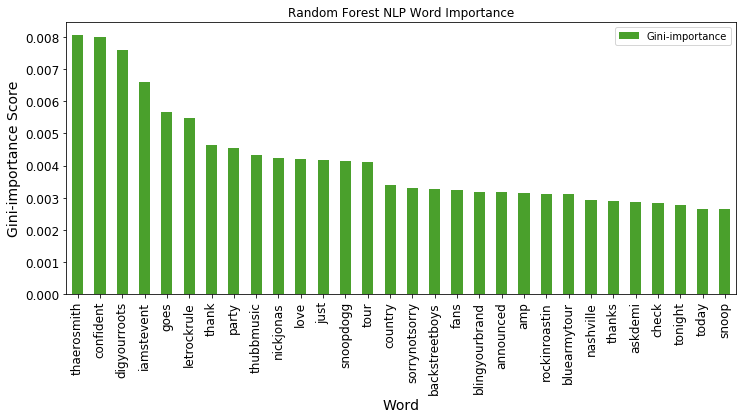

In [42]:
# Check which words these users use the most

forest_feats= {}
for feature, importance in zip(vectorizer.get_feature_names(), forest.feature_importances_):
    forest_feats[feature] = importance
    
forest_feat_importances = pd.DataFrame.from_dict(forest_feats, orient='index').rename(columns={0:'Gini-importance'})
forest_feat_importances.sort_values(by='Gini-importance', ascending = False)[10:40].plot(kind = 'bar', 
                                                                            rot = 90,               
                                                                            figsize = (12,5), 
                                                                            fontsize = 12, 
                                                                            color = '#4AA02C',
                                                                           title = 'Random Forest NLP Word Importance')
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)
plt.show()

### 4) Model Evaluation

Four algorithms were used the learn the language pattern. 

Overall, Multinomial Naive Bayes model yields better results.

---

### What's Next?

There are many emojis in the tweets. It would be interesting to learn the frequency of the emojis these users use and the type of emojis they use. 